# Vol #6 LaMuLog: 26 novembre 2023 - 2eme vol module acquisition de données LaMulog

Chargement des librairies généralement utilisées.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

## Définition des sous-routines

In [2]:
# Sous-routine servant à préparer et formater rapidement des séries de graphs x*y servant à l'exploration des données

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
# Define the date format
#date_form = DateFormatter("%m-20%y")

# Subroutine used to create a grid of XY plots
def grid_scatterplot(pgda_data, x_parameter, y_parameters, color_parameter, title):
    import matplotlib.pyplot as plt

    # Definition of the grid size used to display results based on the number of parameters selected
    grid_x=3
    if (len(y_parameters.axes[1])%grid_x==0):
        grid_y=len(y_parameters.axes[1])//grid_x
    else:
        grid_y=len(y_parameters.axes[1])//grid_x+1
    
    # Definition of the plots - Loops over the parameters contained in y_parameters
    fig, axs = plt.subplots(grid_y, grid_x, figsize=(grid_x*4,grid_y*4))
    fig.tight_layout(h_pad=3)
    fig.suptitle(title)
    plt.subplots_adjust(hspace =0.2, top=0.95, wspace=0.5)

    for i in range(0, len(y_parameters.axes[1])):
        colname = y_parameters.columns[i]
        x_pos=(i)%grid_x
        y_pos=(i)//grid_x
        ax = sns.scatterplot(x=x_parameter, y=pgda_data[colname], hue=color_parameter, ax=axs[y_pos,x_pos], palette="deep")
        #scatter.legend(fontsize = 12,bbox_to_anchor= (1.03, 1),title=color_parameter.name, title_fontsize = 12,shadow = True,facecolor = 'white');
        #ax.set(xlabel="Date", ylabel="Calculated inlet losses (inH2O)", title=site_id)
        #ax.xaxis.set_major_formatter(date_form)
        # Ensure ticks fall once every 52 weeks
        #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=52))

# Tests module au sol

Premier vol LaMuLog V1 = Wemos D1 + MPU6050 + BMP280 + OpenLog

In [5]:
my_filename='LOG00060.TXT'

# Count number of rows in file
f = open(my_filename, 'rb')
rows_in_file=len(f.readlines())
print("Nombre de lignes dans datalog "+my_filename+":"+str(rows_in_file))

# Find header row
import csv
with open(my_filename, 'r') as f:
    reader = csv.reader(f)
    amr_csv = list(reader)
    header_index=1
    for line in amr_csv:
        if line[0]=="millis":
            print ("header index found in row "+ str(header_index))
            break
        header_index=header_index+1
    if header_index==rows_in_file+1:
        print("Found no index in file. Will add one.")
        datalog_header="millis,roll,pitch,yaw,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,CurrentTemp,CurrentPres,altitude,altitude_lissee,max_altitude,phase_vol"
        with open(my_filename, 'r') as original: data = original.read()
        my_filename="edited_"+my_filename
        with open(my_filename, 'w') as modified: modified.write(datalog_header+"\n" + data)
        header_index=1
        
        
# Extract content in panda dataframe - exclude corrupted rows
RawData = pd.read_csv(my_filename, delimiter=',', on_bad_lines='skip', skiprows = header_index-1)
RawData = RawData.apply(pd.to_numeric, errors='coerce')
RawData=RawData.dropna() 

# Prevew results
print("RawData: "+str(RawData.shape))
print(RawData.dtypes)
duree=(RawData['millis'].iloc[-1]-RawData['millis'].iloc[0])/1000
print('Durée de l\'enregistrement: '+str(int(duree/60))+' minutes et '+str(round(duree%60,2))+' secondes')
print('Data aquisition frequency: '+str(round(RawData.shape[0]/(duree),2))+' Hz')
print('Nombre de lignes retirees: '+str(rows_in_file-RawData.shape[0]))

Nombre de lignes dans datalog LOG00060.TXT:47174
header index found in row 4
RawData: (47169, 16)
millis             float64
roll               float64
pitch              float64
yaw                float64
AccX               float64
AccY               float64
AccZ               float64
GyroX              float64
GyroY              float64
GyroZ              float64
CurrentTemp        float64
CurrentPres        float64
altitude           float64
altitude_lissee    float64
max_altitude       float64
phase_vol          float64
dtype: object
Durée de l'enregistrement: 7 minutes et 53.15 secondes
Data aquisition frequency: 99.69 Hz
Nombre de lignes retirees: 5


In [6]:
# Traverse data frame to detect mixed data types
#for column in Data.columns:
#    print(column,':',pd.api.types.infer_dtype(Data[column]))

In [7]:
display(RawData.head())
display(RawData.tail())

,millis,roll,pitch,yaw,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,CurrentTemp,CurrentPres,altitude,altitude_lissee,max_altitude,phase_vol
0,28308.0,-6.83,1.54,-9.48,-8.51,-4.25,-1.03,-0.22,0.09,-0.33,14.37,101325.52,1.69,0.17,0.17,0.0
1,28320.0,-6.84,1.53,-9.48,-8.59,-4.31,-1.08,-0.21,0.17,-0.39,14.37,101325.52,1.69,0.32,0.32,0.0
2,28330.0,-6.85,1.53,-9.48,-8.55,-4.32,-1.06,-0.19,0.23,-0.45,14.37,101325.75,1.67,0.46,0.46,0.0
3,28339.0,-6.86,1.52,-9.49,-8.48,-4.31,-1.11,-0.19,0.28,-0.51,14.37,101325.75,1.67,0.58,0.58,0.0
4,28351.0,-6.86,1.51,-9.50,-8.44,-4.31,-1.27,-0.18,0.34,-0.54,14.37,101325.75,1.67,0.69,0.69,0.0


,millis,roll,pitch,yaw,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,CurrentTemp,CurrentPres,altitude,altitude_lissee,max_altitude,phase_vol
47165,501417.0,-109.98,28.28,8.81,2.99,-9.70,0.63,-0.23,0.04,-0.10,15.0,101289.02,4.73,4.74,125.59,0.0
47166,501427.0,-109.98,28.28,8.81,3.02,-9.65,0.52,-0.25,0.04,-0.14,15.0,101289.02,4.73,4.74,125.59,0.0
47167,501438.0,-109.99,28.28,8.81,3.01,-9.64,0.34,-0.30,0.03,-0.14,15.0,101289.02,4.73,4.74,125.59,0.0
47168,501448.0,-109.99,28.28,8.81,3.03,-9.73,0.17,-0.35,0.02,-0.12,15.0,101289.02,4.73,4.74,125.59,0.0
47169,501458.0,-110.00,28.28,8.81,3.04,-9.84,-0.01,-0.36,0.01,-0.09,15.0,101289.02,4.73,4.74,125.59,0.0


Text(0, 0.5, 'Altitude (m)')

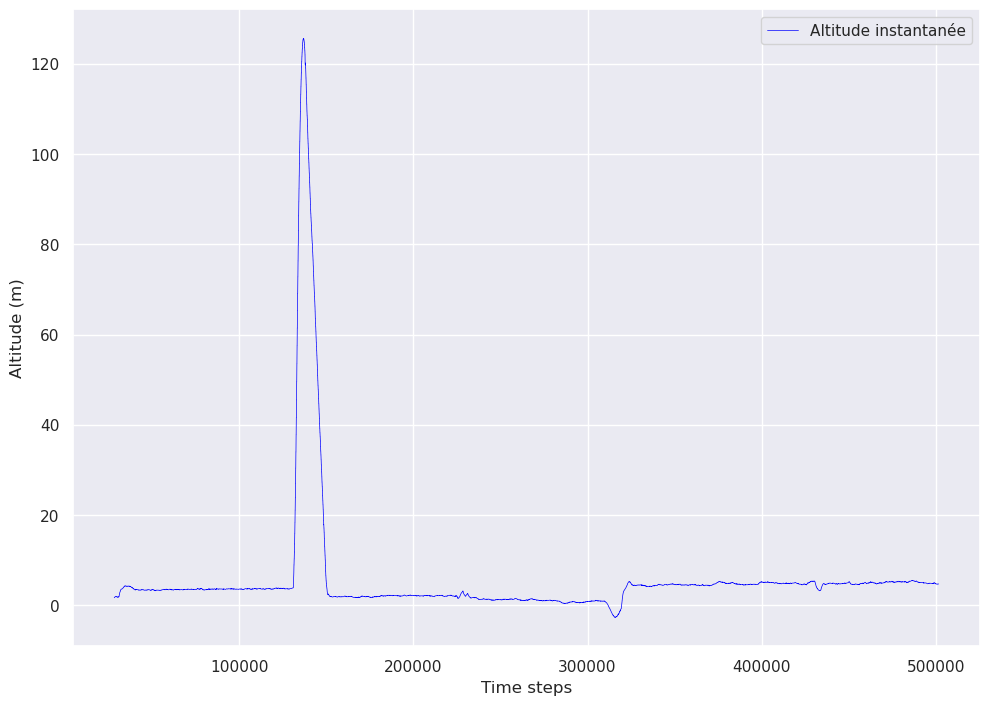

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot=sns.lineplot(x=RawData['millis'], y=RawData['altitude'], label='Altitude instantanée', color='blue', linewidth=0.5)
#plot.set(ylim=(-6, 6))
plot.set_xlabel("Time steps", fontsize = 12)
plot.set_ylabel("Altitude (m)", fontsize = 12)

In [36]:
Data=RawData[(RawData['millis']>=130000)&(RawData['millis']<=155000)].copy()

3.817075471698112


Text(0, 0.5, 'Altitude (m)')

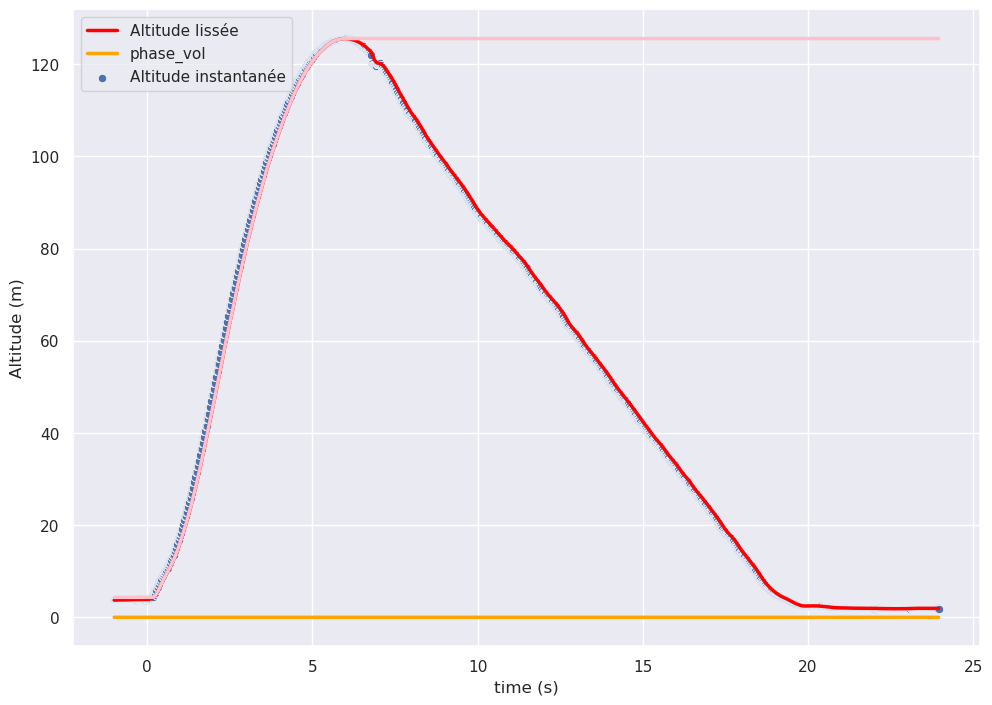

In [47]:
Data['source']='vol 7'

# Instant du décollage - lu sur graph précédent
take_off_time=131050

# Calcul de la valeur moyenne de l'atitude pendant les 10000 millisecondes avant le décollage
altitude_offset=Data[(Data.millis>(take_off_time-5000))&(Data.millis<take_off_time)].altitude.mean()
#print(altitude_offset)
print(altitude_offset)

# Calcul des parametres apres corrections de temps et d'altitude
Data['time_sec']=(Data.millis-take_off_time)/1000.0
Data['alt']=Data['altitude']-altitude_offset
PlotData=Data[(Data.time_sec>-1)&(Data.time_sec<=25)]
#Data=Data[(Data.time_sec>-1)&(Data.time_sec<=20)]

plot=sns.lineplot(x=PlotData['time_sec'], y=PlotData['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
#plot=sns.lineplot(x=Data['millis'], y=Data['GyroX'], label='GyroX',color='green', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['phase_vol'], label='phase_vol',color='orange', linewidth=2.5)
sns.lineplot(x=PlotData['time_sec'], y=PlotData['max_altitude'], color='pink', linewidth=2.5)
sns.scatterplot(x=PlotData['time_sec'], y=PlotData['altitude'], label='Altitude instantanée')
#plot.set(ylim=(-6, 6))
plot.set_xlabel("time (s)", fontsize = 12)
plot.set_ylabel("Altitude (m)", fontsize = 12)

In [48]:
combined_datalog=pd.read_csv('LaMule_multiple_flights.csv')
print(combined_datalog.shape)

(1657, 19)


In [49]:
print(PlotData.shape)
combined_datalog = pd.concat([combined_datalog, PlotData], ignore_index=True)
print(combined_datalog.shape)
combined_datalog.to_csv('LaMule_multiple_flights.csv', index=False) 

(2479, 19)
(4136, 19)


<Axes: xlabel='time_sec', ylabel='altitude'>

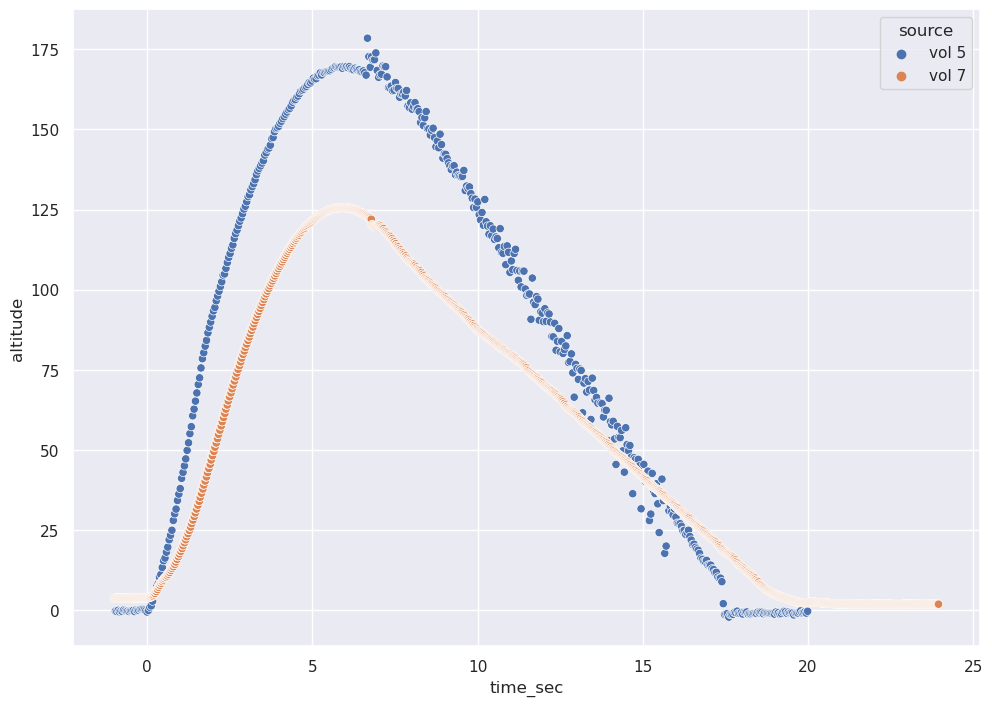

In [45]:
sns.scatterplot(x=combined_datalog['time_sec'], y=combined_datalog['altitude'], hue=combined_datalog.source)

Text(0, 0.5, 'Altitude (m)')

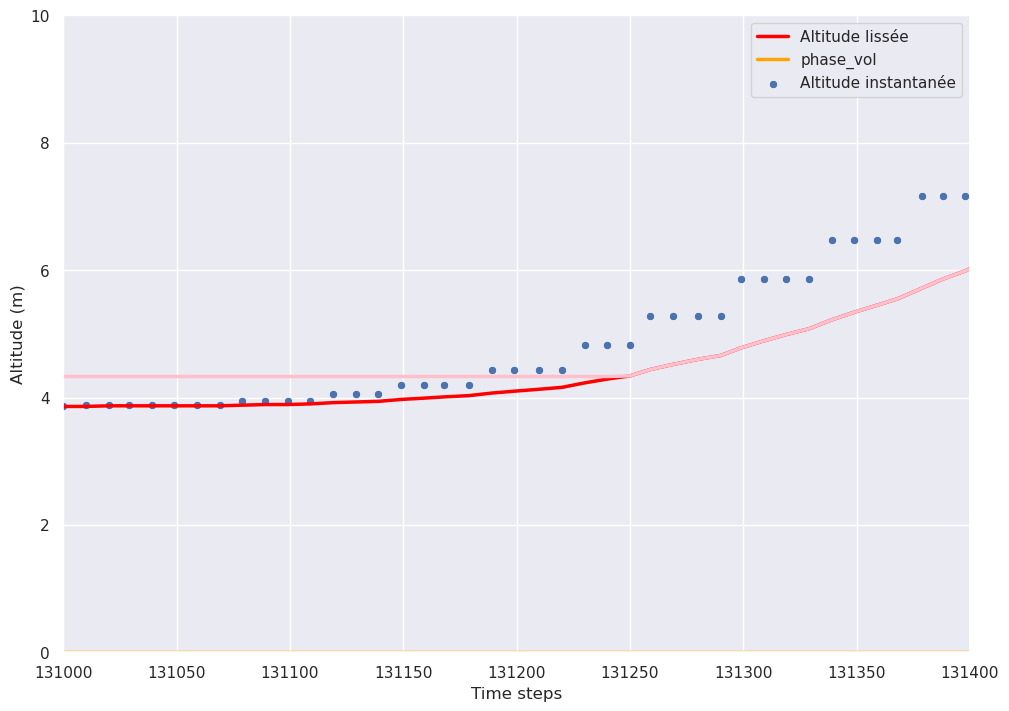

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
#plot=sns.lineplot(x=Data['millis'], y=Data['GyroX'], label='GyroX',color='green', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['phase_vol'], label='phase_vol',color='orange', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['max_altitude'], color='pink', linewidth=2.5)
sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
plot.set(xlim=(131000, 131400))
plot.set(ylim=(0, 10))
plot.set_xlabel("Time steps", fontsize = 12)
plot.set_ylabel("Altitude (m)", fontsize = 12)

Text(0, 0.5, 'Angles')

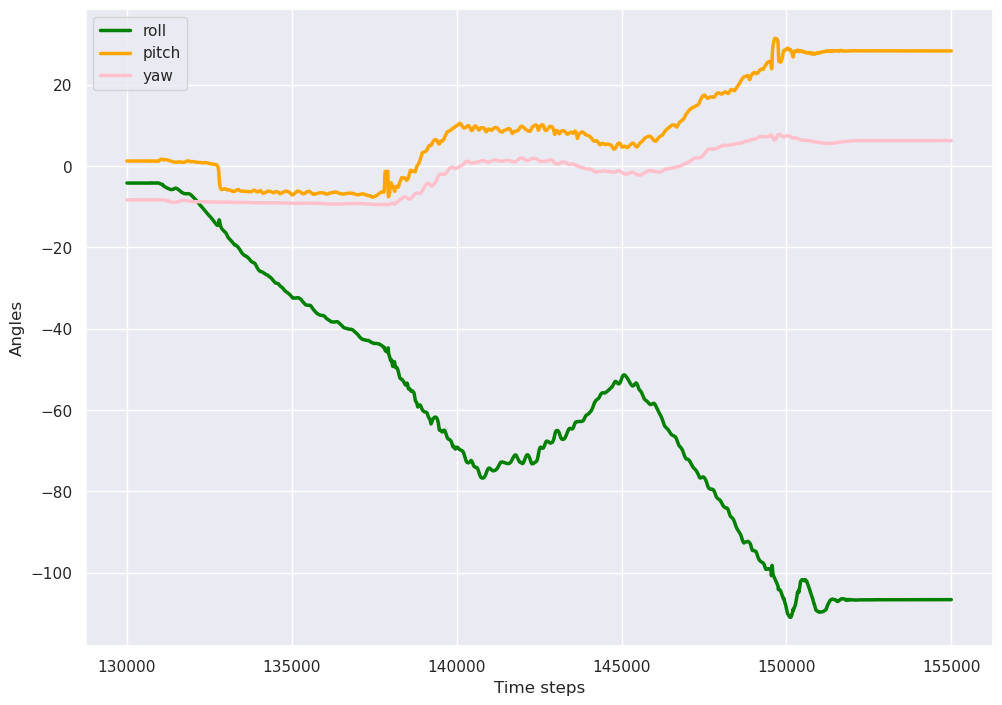

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
plot=sns.lineplot(x=Data['millis'], y=Data['roll'], label='roll',color='green', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['pitch'], label='pitch',color='orange', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['yaw'], label='yaw',color='pink', linewidth=2.5)
#sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
plot.set_xlabel("Time steps", fontsize = 12)
plot.set_ylabel("Angles", fontsize = 12)

Text(0, 0.5, 'Accelerations')

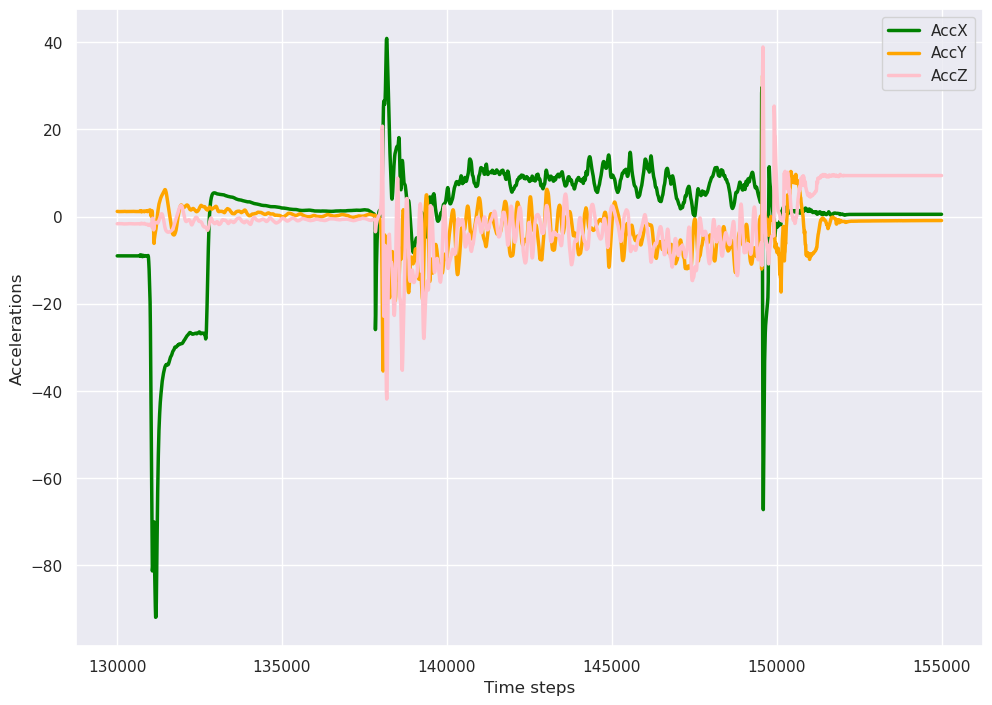

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
plot=sns.lineplot(x=Data['millis'], y=Data['AccX'], label='AccX',color='green', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['AccY'], label='AccY',color='orange', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['AccZ'], label='AccZ',color='pink', linewidth=2.5)
#sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
plot.set_xlabel("Time steps", fontsize = 12)
plot.set_ylabel("Accelerations", fontsize = 12)

Text(0, 0.5, 'Vitesses angulaires')

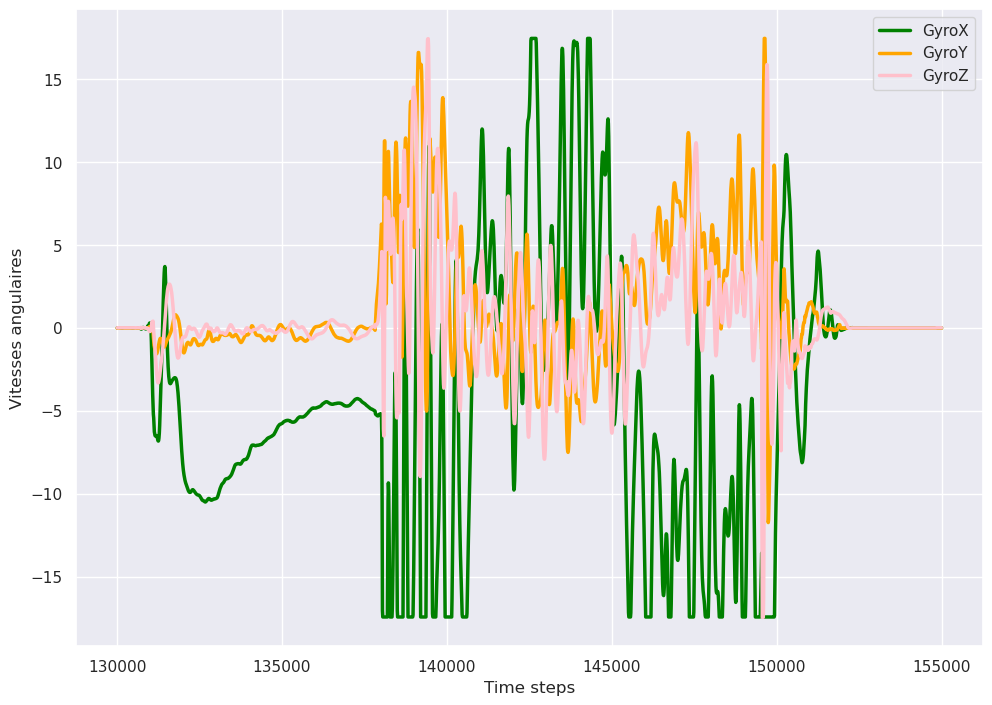

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

#plot=sns.lineplot(x=Data['millis'], y=Data['altitude_lissee'], label='Altitude lissée',color='red', linewidth=2.5)
plot=sns.lineplot(x=Data['millis'], y=Data['GyroX'], label='GyroX',color='green', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['GyroY'], label='GyroY',color='orange', linewidth=2.5)
sns.lineplot(x=Data['millis'], y=Data['GyroZ'], label='GyroZ',color='pink', linewidth=2.5)
#sns.scatterplot(x=Data['millis'], y=Data['altitude'], label='Altitude instantanée')
plot.set_xlabel("Time steps", fontsize = 12)
plot.set_ylabel("Vitesses angulaires", fontsize = 12)